In [1]:
### ARQUIVO FINALIZADO ###

In [2]:
### ROTINA DE TRABALHO: ###

# *Cada arquivo contém somente um dado número de pontos (N = 500; 100; 50; 10);
# *Uma distribuição simulada por arquivo, sendo elas: Bimodal Iguais, Bimodal Maior/Menor e Bimodal Menor/Maior;
# *Cada arquivo com 10 valores de SNR, sendo eles: 100.000, 10.000, 1.000, 100, 10, 1;
# *Serão aplicadas as penalizações 'n' (norma), 'g' (gradiente) e 'c' (curvatura) e também a não-negatividade 'nn0';
# *Segundo a lógica proposta, serão 12 arquivos como este, contendo 72 decaimentos analisados no total;

# mg1 = [[1e-3,0.3,1],[1e-1,0.3,1]]
# mg2 = [[1e-3,0.3,1],[1e-1,0.3,0.5]]
# mg3 = [[1e-3,0.3,0.5],[1e-1,0.3,1]]
# Xi = 1e-4; Xf = 1e0
# Manter a densidade de pontos em 1 pt/ms ou 1000 pts/s

#ARQUIVO 100 PTS

In [1]:
import Laplin as lp
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [4]:
def FindOpt(ni,nf,Ns,gi,gf,Gs,ci,cf,Cs,reg):
    #Ajuste Grosso
    Bn = (nf/ni)**(1.0/(Ns-1))
    Bg = (gf/gi)**(1.0/(Gs-1))
    Bc = (cf/ci)**(1.0/(Cs-1))
    Min = 1e10
    for i in range(Ns):
        n=ni*Bn**i
        print "Laço ",n," da varredura em Ns."
        for j in range(Gs):
            g=gi*Bg**j
            for k in range(Cs):
                c=ci*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste grosso: ',PRes
    #Ajuste Fino
    Bn = Bn**(1.0/(Ns-1))
    Bg = Bg**(1.0/(Gs-1))
    Bc = Bc**(1.0/(Cs-1))
    for i in range(Ns):
        n=PRes[1]*Bn**i
        print "Laço ",n," da varredura em N."
        for j in range(Gs):
            g=PRes[2]*Bg**j
            for k in range(Cs):
                c=PRes[3]*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste fino: ',PRes
    return PRes

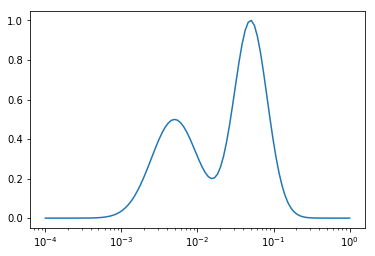

In [3]:
mg = [[5e-3,0.7,0.5],[5e-2,0.5,1]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,100) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
#plt.xlabel('inverse time [s]')
#plt.ylabel('amplitude')
plt.xscale('log')
#plt.grid(True)
#plt.legend(['Dist. Simulada'],loc=0)
plt.savefig('Tabela_mM_100pt.png',dpi=300)
#plt.show()

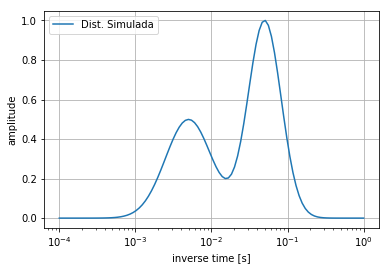

In [5]:
mg = [[5e-3,0.7,0.5],[5e-2,0.5,1]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,100) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada'],loc=0)
plt.savefig('Sim_Dist_mM_100pt.png',dpi=300)

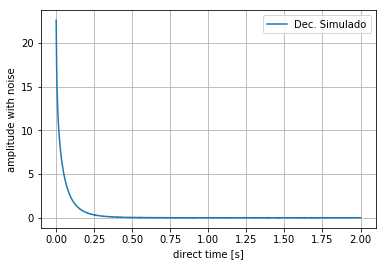

In [6]:
# SNR = 100.000

sig1 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig1.genX(1e-4,2,2000) #xi, xf, N
sig1.genY()
sig1.addGaussNoise(1e5)
#sig1.plotData()

plt.plot(sig1.x,sig1.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e5_mM_100pt.png',dpi=300)

In [5]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,100) #Xi, Xf, N

Opt1 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg1)
print Opt1

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.791961900519836, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.3861877968065201, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.20800493481639615, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.12526960580954632, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.04564600281450323, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.015741588213803434, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.00991344284299347, 1e-08, 1e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.009913437798603902, 1e-08, 8.362510309503733e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.009913426925773978, 1e-08, 5.848035476425729e-06, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.009913387824150808, 1e-08, 4.8904256961953734e-05, 

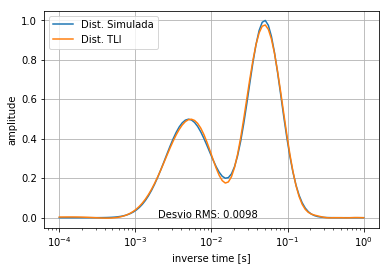

In [7]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,100) #Xi, Xf, N
reg1.genY([0.0005178037397429365, 1.2661403572124612e-08, 0.028599382966174536], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg1.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg1.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg1.X,reg1.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0098')
plt.savefig('Sim_Comp_1e5_mM_100pt.png',dpi=300)

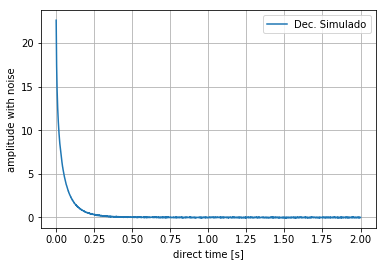

In [8]:
# SNR = 10.000

sig2 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig2.genX(1e-4,2,2000) #xi, xf, N
sig2.genY()
sig2.addGaussNoise(1e4)
#sig2.plotData()

plt.plot(sig2.x,sig2.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e4_mM_100pt.png',dpi=300)

In [8]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,100) #Xi, Xf, N

Opt2 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,4,10,reg2)
print Opt2

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [1.0156356785644902, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.9524668927722626, 1e-08, 1e-08, 9.032010701366822e-08]
Última otimização do ajuste grosso:  [0.6188348451883221, 1e-08, 1e-08, 8.15772173096048e-07]
Última otimização do ajuste grosso:  [0.4704055343477694, 1e-08, 1e-08, 7.368062997280772e-06]
Última otimização do ajuste grosso:  [0.2641147855328928, 1e-08, 1e-08, 6.654842383978484e-05]
Última otimização do ajuste grosso:  [0.1479209807640452, 1e-08, 1e-08, 0.0006010660762800316]
Última otimização do ajuste grosso:  [0.08923131925889405, 1e-08, 1e-08, 0.005428835233189812]
Última otimização do ajuste grosso:  [0.04748766629366636, 1e-08, 1e-08, 0.04903329792212763]
Última otimização do ajuste grosso:  [0.02133581902124031, 1e-08, 1e-08, 0.4428692715559643]
Última otimização do ajuste grosso:  [0.021335809475467107, 1e-08, 8.362510309503733e-08, 0.4428692715559643]
Última otimização do a

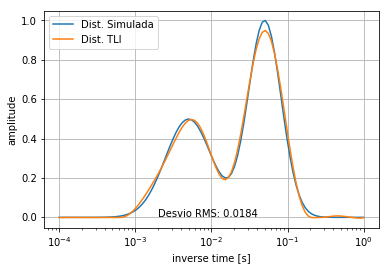

In [9]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,100) #Xi, Xf, N
reg2.genY([0.00341995189335339, 0.03621083296484821, 0.5655536626848444], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg2.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg2.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg2.X,reg2.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0184')
plt.savefig('Sim_Comp_1e4_mM_100pt.png',dpi=300)

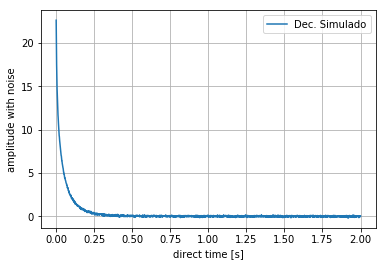

In [10]:
# SNR = 1.000

sig3 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig3.genX(1e-4,2,2000) #xi, xf, N
sig3.genY()
sig3.addGaussNoise(1e3)
#sig3.plotData()

plt.plot(sig3.x,sig3.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e3_mM_100pt.png',dpi=300)

In [17]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,100) #Xi, Xf, N

Opt3 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,9,10,reg3)
print Opt3

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [1.0903358240833327, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.6816765420712072, 1e-08, 1e-08, 9.654893846056295e-06]
Última otimização do ajuste grosso:  [0.4564134870718757, 1e-08, 1e-08, 9.542525683758e-05]
Última otimização do ajuste grosso:  [0.3721649296433438, 1e-08, 1e-08, 0.0009431465314595459]
Última otimização do ajuste grosso:  [0.1497460094798568, 1e-08, 1e-08, 0.00932169751786157]
Última otimização do ajuste grosso:  [0.05296788774861747, 1e-08, 1e-08, 0.09213207249994924]
Última otimização do ajuste grosso:  [0.0297102297644781, 1e-08, 1e-08, 0.9105979642518109]
Última otimização do ajuste grosso:  [0.029710228132557817, 1e-08, 8.362510309503733e-08, 0.9105979642518109]
Última otimização do ajuste grosso:  [0.029710214460564786, 1e-08, 6.993157867655623e-07, 0.9105979642518109]
Última otimização do ajuste grosso:  [0.029710100169015864, 1e-08, 5.848035476425729e-06, 0.910597964251810

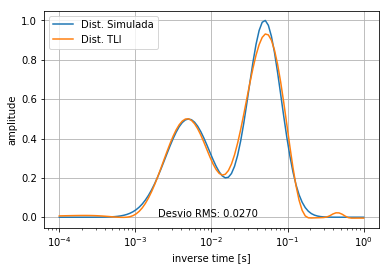

In [11]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,100) #Xi, Xf, N
reg3.genY([0.004330139111899894, 0.03621083296484821, 2.520643868644899], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg3.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg3.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg3.X,reg3.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0270')
plt.savefig('Sim_Comp_1e3_mM_100pt.png',dpi=300)

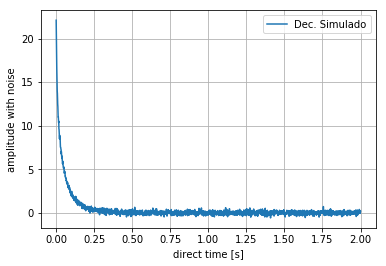

In [12]:
# SNR = 100

sig4 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig4.genX(1e-4,2,2000) #xi, xf, N
sig4.genY()
sig4.addGaussNoise(1e2)
#sig4.plotData()

plt.plot(sig4.x,sig4.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e2_mM_100pt.png',dpi=300)

In [5]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,100) #Xi, Xf, N

Opt4 = FindOpt(1e-8,2,10,1e-8,4,10,1e-8,77,10,reg4)
print Opt4

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [1.0979909006449433, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [1.0378185543048097, 1e-08, 1e-08, 1.5739753946832072e-06]
Última otimização do ajuste grosso:  [0.6936138364615573, 1e-08, 1e-08, 1.974680822212366e-05]
Última otimização do ajuste grosso:  [0.49603207963388096, 1e-08, 1e-08, 0.0002477398543068158]
Última otimização do ajuste grosso:  [0.31876163082126746, 1e-08, 1e-08, 0.003108099026515069]
Última otimização do ajuste grosso:  [0.12195767170883502, 1e-08, 1e-08, 0.03899364349613306]
Última otimização do ajuste grosso:  [0.06703634829615393, 1e-08, 1e-08, 0.48920713919735476]
Última otimização do ajuste grosso:  [0.03025517766256164, 1e-08, 1e-08, 6.137503541196231]
Última otimização do ajuste grosso:  [0.03025517744658283, 1e-08, 9.032010701366822e-08, 6.137503541196231]
Última otimização do ajuste grosso:  [0.030255175488832196, 1e-08, 8.15772173096048e-07, 6.137503541196231]
Última oti

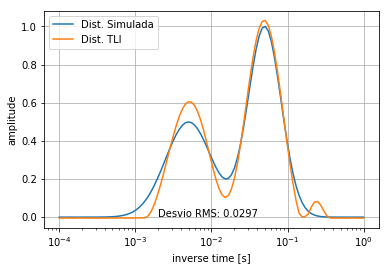

In [13]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,100) #Xi, Xf, N
reg4.genY([2.0297640459171702e-08, 0.4428692715559643, 0.3693493552131899], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg4.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg4.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg4.X,reg4.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0297')
plt.savefig('Sim_Comp_1e2_mM_100pt.png',dpi=300)

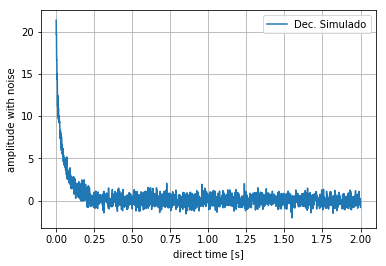

In [14]:
# SNR = 10

sig5 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig5.genX(1e-4,2,2000) #xi, xf, N
sig5.genY()
sig5.addGaussNoise(10)
#sig5.plotData()

plt.plot(sig5.x,sig5.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e1_mM_100pt.png',dpi=300)

In [8]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,100) #Xi, Xf, N

Opt5 = FindOpt(1e-8,2,10,1e-8,20,10,1e-8,602,10,reg5)
print Opt5

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [1.148400484199272, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [1.1339250406753072, 1e-08, 1e-08, 1.5766414625889274e-07]
Última otimização do ajuste grosso:  [1.1164280112549427, 1e-08, 1e-08, 2.485798301554552e-06]
Última otimização do ajuste grosso:  [1.007430861272018, 1e-08, 1e-08, 3.91921266986404e-05]
Última otimização do ajuste grosso:  [0.6600689422181166, 1e-08, 1e-08, 0.0006179193196011497]
Última otimização do ajuste grosso:  [0.5112682878394753, 1e-08, 1e-08, 0.009742372198179115]
Última otimização do ajuste grosso:  [0.2870029247640317, 1e-08, 1e-08, 0.1536022795162282]
Última otimização do ajuste grosso:  [0.21445585382730453, 1e-08, 1e-08, 2.4217572263345932]
Última otimização do ajuste grosso:  [0.09136215395309318, 1e-08, 1e-08, 38.18242855363477]
Última otimização do ajuste grosso:  [0.09136215338466683, 1e-08, 1.0800597388923061e-07, 38.18242855363477]
Última otimização do ajuste gr

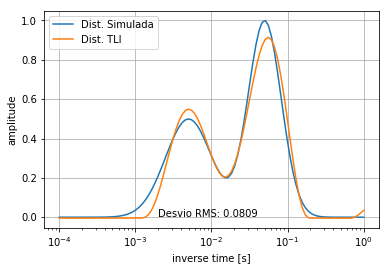

In [15]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,100) #Xi, Xf, N
reg5.genY([1e-08, 1.8517494245745794, 95.7431831518214], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg5.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg5.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg5.X,reg5.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0809')
plt.savefig('Sim_Comp_1e1_mM_100pt.png',dpi=300)